In [23]:
# Import Splinter and BeautifulSoup
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd     

In [6]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)



====== WebDriver manager ======
Current google-chrome version is 98.0.4758
Get LATEST chromedriver version for 98.0.4758 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/98.0.4758.102/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\Rob\.wdm\drivers\chromedriver\win32\98.0.4758.102]


In [10]:
# Visit the mars nasa news site
url = 'https://redplanetscience.com'
browser.visit(url)
# Optional delay for loading the page
browser.is_element_present_by_css('div.list_text', wait_time=1)

True

In [11]:
html = browser.html
news_soup = soup(html, 'html.parser')
slide_elem = news_soup.select_one('div.list_text')

In [12]:
slide_elem.find('div', class_='content_title')

<div class="content_title">NASA's Perseverance Rover 100 Days Out</div>

In [13]:
# Use the parent element to find the first `a` tag and save it as `news_title`
news_title = slide_elem.find('div', class_='content_title').get_text()
news_title

"NASA's Perseverance Rover 100 Days Out"

In [14]:
# Use the parent element to find the paragraph text
news_p = slide_elem.find('div', class_='article_teaser_body').get_text()
news_p

"Mark your calendars: The agency's latest rover has only about 8,640,000 seconds to go before it touches down on the Red Planet, becoming history's next Mars car."

In [15]:
# Visit URL
url = 'https://spaceimages-mars.com'
browser.visit(url)

In [16]:
# Find and click the full image button
full_image_elem = browser.find_by_tag('button')[1]
full_image_elem.click()

In [17]:
# Parse the resulting html with soup
html = browser.html
img_soup = soup(html, 'html.parser')

In [18]:
# Find the relative image url
img_url_rel = img_soup.find('img', class_='fancybox-image').get('src')
img_url_rel

'image/featured/mars1.jpg'

In [27]:
# Use the base URL to create an absolute URL
img_url = f'https://spaceimages-mars.com/image/featured/mars1.jpg'
img_url

'https://spaceimages-mars.com/image/featured/mars1.jpg'

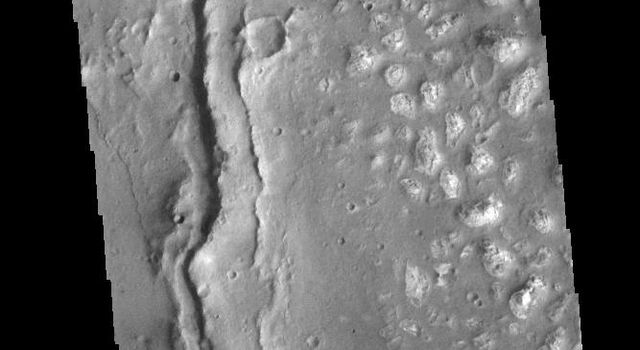

In [28]:
from IPython import display
display.Image("https://spaceimages-mars.com/image/featured/mars1.jpg")

In [24]:
df = pd.read_html('https://galaxyfacts-mars.com')[0]
df.columns=['description', 'Mars', 'Earth']
df.set_index('description', inplace=True)
df

,Mars,Earth
description,,
Mars - Earth Comparison,Mars,Earth
Diameter:,"6,779 km","12,742 km"
Mass:,6.39 × 10^23 kg,5.97 × 10^24 kg
Moons:,2,1
Distance from Sun:,"227,943,824 km","149,598,262 km"
Length of Year:,687 Earth days,365.24 days
Temperature:,-87 to -5 °C,-88 to 58°C


In [25]:
df.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Mars</th>\n      <th>Earth</th>\n    </tr>\n    <tr>\n      <th>description</th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>Mars - Earth Comparison</th>\n      <td>Mars</td>\n      <td>Earth</td>\n    </tr>\n    <tr>\n      <th>Diameter:</th>\n      <td>6,779 km</td>\n      <td>12,742 km</td>\n    </tr>\n    <tr>\n      <th>Mass:</th>\n      <td>6.39 × 10^23 kg</td>\n      <td>5.97 × 10^24 kg</td>\n    </tr>\n    <tr>\n      <th>Moons:</th>\n      <td>2</td>\n      <td>1</td>\n    </tr>\n    <tr>\n      <th>Distance from Sun:</th>\n      <td>227,943,824 km</td>\n      <td>149,598,262 km</td>\n    </tr>\n    <tr>\n      <th>Length of Year:</th>\n      <td>687 Earth days</td>\n      <td>365.24 days</td>\n    </tr>\n    <tr>\n      <th>Temperature:</th>\n      <td>-87 to -5 °C</td>\n      <td>-88 to 58°C</td>\n    </tr>\n  </tbody>

In [26]:
browser.quit()